# Customer Service Requests Analysis

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
service_request=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\meetu\AppData\Local\Temp\ipykernel_24476\2261520640.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  service_request=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [3]:
#view the top 30 rows of the dataset
service_request.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,12/31/2015 11:56:30 PM,01-01-16 1:50,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,12/31/2015 11:54:05 PM,01-01-16 1:42,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,501 EAST 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,12/31/2015 11:53:58 PM,01-01-16 8:27,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,83-44 LEFFERTS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,12/31/2015 11:53:58 PM,01-01-16 1:17,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


In [4]:
#view the bottom 10 rows of the dataset
service_request.tail(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300688,30280732,03/29/2015 12:37:15 AM,03/29/2015 01:02:39 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10014.0,22 9 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740361,-74.005781,"(40.74036064515079, -74.00578103597579)"
300689,30283432,03/29/2015 12:35:28 AM,03/29/2015 04:14:27 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11233.0,120 CHAUNCEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.680399,-73.929417,"(40.6803990181202, -73.92941723335176)"
300690,30280538,03/29/2015 12:35:23 AM,03/29/2015 08:41:24 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10466.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.900403,-73.840809,"(40.90040252667784, -73.84080863767632)"
300691,30279999,03/29/2015 12:35:04 AM,03/29/2015 02:52:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10034.0,97 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863805,-73.925358,"(40.863805379005, -73.92535778152539)"
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)"
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


In [5]:
#check the shape of the dataset
service_request.shape

(300698, 53)

In [6]:
#print the information of the dataframe
service_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
#to display the content
service_request.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [8]:
#print the columns
print(service_request.columns)

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
#print the index
service_request.index

RangeIndex(start=0, stop=300698, step=1)

In [10]:
#make a copy of the Data Frame
df_service_request=pd.DataFrame(service_request)

In [11]:
#drop the columns with too many NAN values
df_service_request= df_service_request.drop(['Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name','School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough','School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Park Facility Name','Intersection Street 1','Intersection Street 2'], axis=1)


In [12]:
#drop all the duplicate columns  
df_service_request = df_service_request.drop(['Agency Name', 'Park Borough', 'Borough', 'Facility Type', 'Address Type'], axis=1)
df_service_request = df_service_request.drop(['Resolution Action Updated Date', 'Street Name', 'Location', 'Landmark'], axis=1)

In [13]:
df_service_request.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Cross Street 1,Cross Street 2,City,Status,Due Date,Resolution Description,Community Board,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,12 MANHATTAN,1005409.0,254678.0,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,27 STREET,28 STREET,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01 QUEENS,1007766.0,221986.0,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,07 BRONX,1015081.0,256380.0,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,EDISON AVENUE,B STREET,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,10 BRONX,1031740.0,243899.0,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,SEABURY STREET,HOFFMAN DRIVE,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,04 QUEENS,1019123.0,206375.0,40.733060,-73.874170


In [14]:
#convert all the city name to upper case
df_service_request['City']=df_service_request['City'].str.upper()

In [15]:
#convert the Created Date and Closed Date into datetime datatype 
df_service_request['Created Date']=pd.to_datetime(df_service_request['Created Date'])

In [16]:
df_service_request['Closed Date'] = pd.to_datetime(df_service_request['Closed Date'])

In [17]:
#check the datatypes of the created date and closed date
df_service_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Unique Key                  300698 non-null  int64         
 1   Created Date                300698 non-null  datetime64[ns]
 2   Closed Date                 298534 non-null  datetime64[ns]
 3   Agency                      300698 non-null  object        
 4   Complaint Type              300698 non-null  object        
 5   Descriptor                  294784 non-null  object        
 6   Location Type               300567 non-null  object        
 7   Incident Zip                298083 non-null  float64       
 8   Incident Address            256288 non-null  object        
 9   Cross Street 1              251419 non-null  object        
 10  Cross Street 2              250919 non-null  object        
 11  City                        298084 non-

In [18]:
import datetime
Closing_Time= df_service_request['Closed Date']
created_Time= df_service_request['Created Date']

In [19]:
#calculate the difference between the complaint created time and closed time
Request_Closing_Time=Closing_Time - created_Time

In [20]:
#insert a new column with the time difference
df_service_request.insert(loc=3, column='Request Closing Time', value=Request_Closing_Time)

In [21]:
df_service_request.head()

,Unique Key,Created Date,Closed Date,Request Closing Time,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Cross Street 2,City,Status,Due Date,Resolution Description,Community Board,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,WEST 204 STREET,NEW YORK,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,12 MANHATTAN,1005409.0,254678.0,40.865682,-73.923501
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,28 STREET,ASTORIA,Closed,01-01-16 7:59,The Police Department responded to the complai...,01 QUEENS,1007766.0,221986.0,40.775945,-73.915094
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,EAST 199 STREET,BRONX,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,07 BRONX,1015081.0,256380.0,40.870325,-73.888525
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,B STREET,BRONX,Closed,01-01-16 7:57,The Police Department responded to the complai...,10 BRONX,1031740.0,243899.0,40.835994,-73.828379
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,HOFFMAN DRIVE,ELMHURST,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,04 QUEENS,1019123.0,206375.0,40.733060,-73.874170


In [22]:
# replace the missing values in the 'City' column with the string, 'Unknown'
df_service_request['City']=df_service_request['City'].astype(object).fillna("UNKNOWN")

In [23]:
#replace the missing values in the 'Location Type'column with the string, 'Unspecified'
df_service_request['Location Type']=df_service_request['Location Type'].astype(object).fillna("UNSPECIFIED")

In [24]:
# in order to replace NaN values with 0, first we have to exclude datetime datatype columns
n=df_service_request.select_dtypes(exclude=['datetime','timedelta'])

In [25]:
#fill NaN columns with 0
df_service_request[n.columns]=n.fillna(0)

In [26]:
#print the last 5 rows of the dataframe
df_service_request.tail(5)

,Unique Key,Created Date,Closed Date,Request Closing Time,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Cross Street 2,City,Status,Due Date,Resolution Description,Community Board,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
300693,30281872,2015-03-29 00:33:41,NaT,NaT,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,0.0,CRESCENT AVENUE,...,0,UNKNOWN,Open,03/29/2015 08:33:41 AM,Your complaint has been forwarded to the New Y...,0 Unspecified,0.0,0.0,0.000000,0.000000
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,0 days 02:00:31,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,102 STREET,RICHMOND HILL,Closed,03/29/2015 08:33:28 AM,The Police Department responded and upon arriv...,09 QUEENS,1026931.0,192185.0,40.694077,-73.846087
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,0 days 03:07:17,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,ELLERY STREET,BROOKLYN,Closed,03/29/2015 08:33:03 AM,The Police Department responded to the complai...,03 BROOKLYN,999713.0,194161.0,40.699590,-73.944234
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,0 days 04:05:33,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,LA SALLE AVENUE,BRONX,Closed,03/29/2015 08:33:02 AM,The Police Department responded to the complai...,10 BRONX,1030021.0,244520.0,40.837708,-73.834587
300697,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,0 days 04:08:49,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,8 AVENUE,NEW YORK,Closed,03/29/2015 08:33:01 AM,The Police Department responded to the complai...,05 MANHATTAN,988150.0,216378.0,40.760583,-73.985922


In [27]:
#fill NaT in 'Closed Date' column with -- as the complaint is still open
df_service_request['Closed Date'].fillna(value='--', inplace=True)

In [28]:
#select relevant columns for the analysis
df_analyze_service_request=df_service_request[['Unique Key','Created Date', 'Closed Date','Request Closing Time', 'Complaint Type','City', 'Status','Resolution Description']]

In [29]:
#check the type and shape of the new dataframe
print(type(df_analyze_service_request))
print(df_analyze_service_request.shape)
print(df_analyze_service_request.info())

<class 'pandas.core.frame.DataFrame'>
(300698, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              300698 non-null  int64          
 1   Created Date            300698 non-null  datetime64[ns] 
 2   Closed Date             300698 non-null  object         
 3   Request Closing Time    298534 non-null  timedelta64[ns]
 4   Complaint Type          300698 non-null  object         
 5   City                    300698 non-null  object         
 6   Status                  300698 non-null  object         
 7   Resolution Description  300698 non-null  object         
dtypes: datetime64[ns](1), int64(1), object(5), timedelta64[ns](1)
memory usage: 18.4+ MB
None


In [30]:
#check the top 5 rows
df_analyze_service_request.head()

,Unique Key,Created Date,Closed Date,Request Closing Time,Complaint Type,City,Status,Resolution Description
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15,Noise - Street/Sidewalk,NEW YORK,Closed,The Police Department responded and upon arriv...
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16,Blocked Driveway,ASTORIA,Closed,The Police Department responded to the complai...
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31,Blocked Driveway,BRONX,Closed,The Police Department responded and upon arriv...
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14,Illegal Parking,BRONX,Closed,The Police Department responded to the complai...
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02,Illegal Parking,ELMHURST,Closed,The Police Department responded and upon arriv...


In [31]:
#print the count of the columns
df_analyze_service_request.count()

Unique Key                300698
Created Date              300698
Closed Date               300698
Request Closing Time      298534
Complaint Type            300698
City                      300698
Status                    300698
Resolution Description    300698
dtype: int64

In [32]:
# print the type of complaints
complaint_type=df_analyze_service_request['Complaint Type']
print(complaint_type)

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
300693         Noise - Commercial
300694           Blocked Driveway
300695         Noise - Commercial
300696         Noise - Commercial
300697         Noise - Commercial
Name: Complaint Type, Length: 300698, dtype: object


In [33]:
#print the top 10 complaint types
complaint_type.value_counts().head(10)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

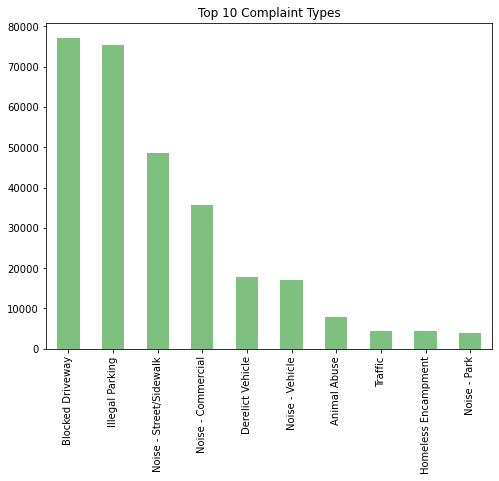

In [34]:
#plot a bar graph
plt.figure(figsize=(8,6))
complaint_type.value_counts().head(10).plot(kind='bar', color='g', alpha=.5)
plt.title("Top 10 Complaint Types")
plt.show()

In [35]:
#group the cities using groupby function and check the no. of complaints per city
groupby_city=df_analyze_service_request.groupby('City')
complaints_per_city=groupby_city.size()

In [36]:
#sort them in descending order to get city with maximum and minimum complaints
sorted_complaints=complaints_per_city.sort_values(ascending=False)
sorted_complaints.head(10)

City
BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           7047
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3664
dtype: int64

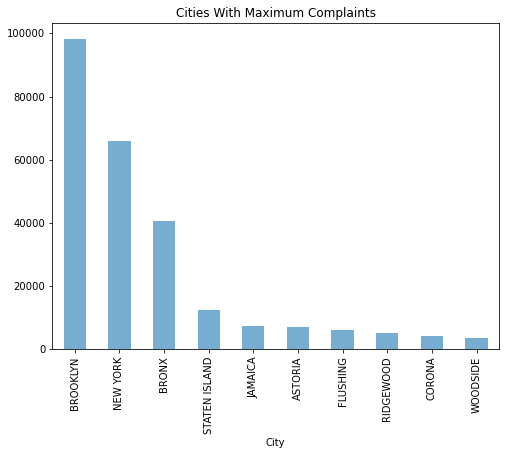

In [37]:
#plot graph of 10 cities with maximum complaints
plt.figure(figsize=(8,6))
sorted_complaints.head(10).plot.bar(alpha=.6)
plt.title("Cities With Maximum Complaints")
plt.show()

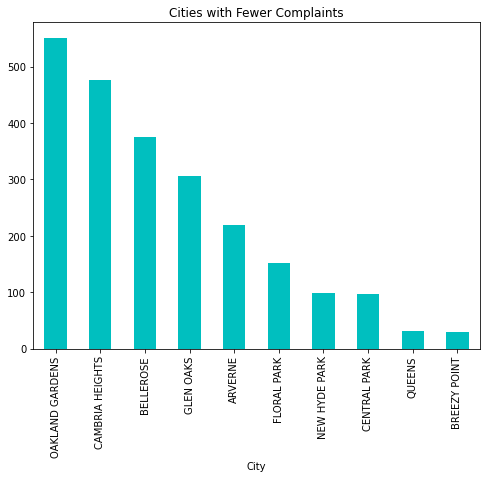

In [38]:
#plot graph of 10 cities with fewer complaints
plt.figure(figsize=(8,6))
sorted_complaints.tail(10).plot(kind='bar', color='c')
plt.title("Cities with Fewer Complaints")
plt.show()

In [39]:
#select the status of the complaints and count them
status=df_analyze_service_request['Status']
status.value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

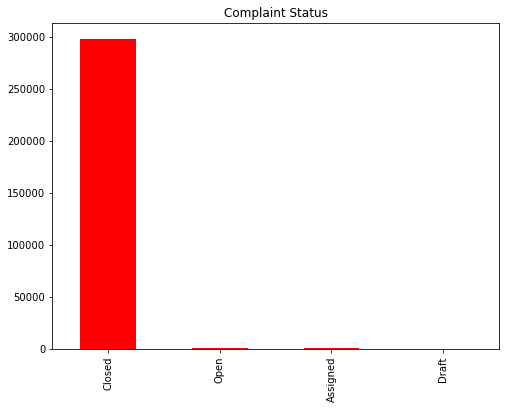

In [40]:
#Plot the bar graph to check the ratio of closed to open complaints
plt.figure(figsize=(8,6))
status.value_counts().plot(kind='bar', color='r')
plt.title('Complaint Status')
plt.show()

In [41]:
#select the relevant columns from the dataframe
df_new=df_service_request[['City', 'Complaint Type','Request Closing Time']]
df_new

,City,Complaint Type,Request Closing Time
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15
1,ASTORIA,Blocked Driveway,0 days 01:26:16
2,BRONX,Blocked Driveway,0 days 04:51:31
3,BRONX,Illegal Parking,0 days 07:45:14
4,ELMHURST,Illegal Parking,0 days 03:27:02
...,...,...,...
300693,UNKNOWN,Noise - Commercial,NaT
300694,RICHMOND HILL,Blocked Driveway,0 days 02:00:31
300695,BROOKLYN,Noise - Commercial,0 days 03:07:17
300696,BRONX,Noise - Commercial,0 days 04:05:33


In [42]:
#find the average closing time of requests with respect to the type of complaints
mean_time=df_new.groupby(['Complaint Type'])['Request Closing Time'].mean().reset_index()
mean_time.head()

,Complaint Type,Request Closing Time
0,Agency Issues,0 days 05:15:37.166666666
1,Animal Abuse,0 days 05:12:47.677780638
2,Animal in a Park,14 days 00:50:05
3,Bike/Roller/Skate Chronic,0 days 03:45:59.264150943
4,Blocked Driveway,0 days 04:44:27.258638198


In [43]:
#sort the average request closing time in ascending order
average_closing_time=mean_time.sort_values(by='Request Closing Time', ascending=True)
average_closing_time.head()

,Complaint Type,Request Closing Time
19,Posting Advertisement,0 days 01:58:32.891975308
11,Illegal Fireworks,0 days 02:45:40.101190476
13,Noise - Commercial,0 days 03:08:49.755979232
14,Noise - House of Worship,0 days 03:11:35.874058127
15,Noise - Park,0 days 03:24:38.636996519


In [44]:
#dt.floor('s') is used to limit the time to seconds
avg_closing_time= average_closing_time['Request Closing Time'].dt.floor('S')


In [45]:
#convert the series into dataframe using .to_frame()
df_avg_closing_time = avg_closing_time.to_frame()
df_avg_closing_time.head()

,Request Closing Time
19,0 days 01:58:32
11,0 days 02:45:40
13,0 days 03:08:49
14,0 days 03:11:35
15,0 days 03:24:38


In [46]:
#replace the original 'Request Closing Time' with the formatted one using .join
df1=average_closing_time.iloc[:, :-1]
new_df=df1.join(df_avg_closing_time)
new_df.head()

,Complaint Type,Request Closing Time
19,Posting Advertisement,0 days 01:58:32
11,Illegal Fireworks,0 days 02:45:40
13,Noise - Commercial,0 days 03:08:49
14,Noise - House of Worship,0 days 03:11:35
15,Noise - Park,0 days 03:24:38


In [47]:
#convert the timedelta datatype into float datatype
avg_response_time=new_df.iloc[:, -1]
avg_res_time= avg_response_time/np.timedelta64(1,'h')

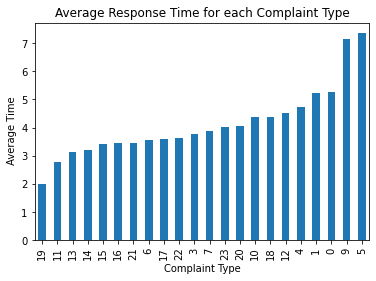

In [48]:
#plot the bar graph
avg_res_time.head(22).plot.bar()
plt.title("Average Response Time for each Complaint Type")
plt.xlabel('Complaint Type')
plt.ylabel(' Average Time')
plt.show()

In [49]:
#select the relevant columns fromthe dataframe
complaint_type1= df_service_request[['Complaint Type', 'Request Closing Time', 'Location Type']]
complaint_type1.head()

,Complaint Type,Request Closing Time,Location Type
0,Noise - Street/Sidewalk,0 days 00:55:15,Street/Sidewalk
1,Blocked Driveway,0 days 01:26:16,Street/Sidewalk
2,Blocked Driveway,0 days 04:51:31,Street/Sidewalk
3,Illegal Parking,0 days 07:45:14,Street/Sidewalk
4,Illegal Parking,0 days 03:27:02,Street/Sidewalk


In [50]:
#find the average response time by grouping the type of complaint and the location
order_1=complaint_type1.groupby(['Complaint Type','Location Type'])['Request Closing Time'].mean().reset_index()

In [51]:
#print the top 5 rows
order_1.head()

,Complaint Type,Location Type,Request Closing Time
0,Agency Issues,UNSPECIFIED,0 days 05:15:37.166666666
1,Animal Abuse,Commercial,0 days 05:20:33.967741935
2,Animal Abuse,House and Store,0 days 05:00:47.741935483
3,Animal Abuse,Park/Playground,0 days 03:42:08.975409836
4,Animal Abuse,Parking Lot,0 days 05:32:25.436363636


In [52]:
# sort them in the asscending order
order_2=order_1.sort_values(by='Request Closing Time', ascending=True)

In [53]:
#Order of the complaint types based on the average request closing time grouping by the location type
order_2.head()

,Complaint Type,Location Type,Request Closing Time
80,Urinating in Public,Subway Station,0 days 01:09:07.666666666
61,Panhandling,Park/Playground,0 days 01:13:07.166666666
54,Noise - House of Worship,UNSPECIFIED,0 days 01:22:30
74,Traffic,UNSPECIFIED,0 days 01:23:15.200000
68,Posting Advertisement,Street/Sidewalk,0 days 01:49:08.375862068


In [54]:
#remove the miliseconds by truncating 
order_3=order_2['Request Closing Time'].dt.floor('S')

In [55]:
#convert the mean"request closing time" into a dataframe
df=order_3.to_frame()

In [56]:
#now merge the two dataframes so that we have the formatted "Request Closing Time" column
df_1=order_2.iloc[:, :-1]
new_order=df_1.join(df)
new_order.head(10)

,Complaint Type,Location Type,Request Closing Time
80,Urinating in Public,Subway Station,0 days 01:09:07
61,Panhandling,Park/Playground,0 days 01:13:07
54,Noise - House of Worship,UNSPECIFIED,0 days 01:22:30
74,Traffic,UNSPECIFIED,0 days 01:23:15
68,Posting Advertisement,Street/Sidewalk,0 days 01:49:08
69,Posting Advertisement,UNSPECIFIED,0 days 01:51:06
52,Noise - Commercial,UNSPECIFIED,0 days 01:54:16
46,Illegal Fireworks,Store/Commercial,0 days 01:55:27
65,Posting Advertisement,Parking Lot,0 days 02:06:56
72,Traffic,Roadway Tunnel,0 days 02:10:37


# 1. Hypothesis Testing
## To test whether the type of complaint and the location are related.
## We test using Chi_Square Test to compare two categorical data. 
### Null Hypothesis H0: The type of complaint is related to the city.
### Alternate Hypothesis H1: The type of complaint and the city  are not related.

In [57]:
from scipy import stats     #from Scipy import stats package

In [58]:
#create the contingency table
contingency_table=pd.crosstab(df_analyze_service_request['City'],df_analyze_service_request['Complaint Type'])

In [59]:
print('Contingency_table:\n', contingency_table)

Contingency_table:
 Complaint Type       Agency Issues  Animal Abuse  Animal in a Park  \
City                                                                 
ARVERNE                          0            38                 0   
ASTORIA                          0           125                 0   
BAYSIDE                          0            37                 0   
BELLEROSE                        0             7                 0   
BREEZY POINT                     0             2                 0   
BRONX                            0          1415                 0   
BROOKLYN                         0          2394                 0   
CAMBRIA HEIGHTS                  0            11                 0   
CENTRAL PARK                     0             0                 0   
COLLEGE POINT                    0            28                 0   
CORONA                           0            61                 0   
EAST ELMHURST                    0            59                 0   


In [60]:
observed_values=contingency_table.values
print("Observed Values:\n", observed_values)    #print the observed frequency

Observed Values:
 [[  0  38   0 ...   0   1   1]
 [  0 125   0 ...  47   9  54]
 [  0  37   0 ...   9   0   2]
 ...
 [  0  28   0 ...  17   0   1]
 [  0  45   0 ...   6   2   6]
 [  0  69   0 ...  39   8  15]]


In [61]:
b=stats.chi2_contingency(contingency_table)
Expected_values=b[3]
print("Expected Values:\n", Expected_values)    #print the expected frequency

Expected Values:
 [[4.38978643e-03 5.69062648e+00 7.31631072e-04 ... 3.29087656e+00
  4.33125594e-01 2.78166133e+00]
 [1.40612841e-01 1.82281113e+02 2.34354735e-02 ... 1.05412760e+02
  1.38738003e+01 8.91016701e+01]
 [2.43633147e-02 3.15829769e+01 4.06055245e-03 ... 1.82643649e+01
  2.40384705e+00 1.54382204e+01]
 ...
 [2.19090250e-02 2.84013994e+01 3.65150417e-03 ... 1.64244657e+01
  2.16169047e+00 1.38830188e+01]
 [4.91656080e-02 6.37350165e+01 8.19426800e-03 ... 3.68578175e+01
  4.85100666e+00 3.11546069e+01]
 [7.31098976e-02 9.47747973e+01 1.21849829e-02 ... 5.48080533e+01
  7.21350990e+00 4.63273051e+01]]


In [62]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
deg=(no_of_rows-1)*(no_of_columns-1)
print("degrees of freedom - ", deg)
alpha=0.05

degrees of freedom -  1


In [63]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in
                zip(observed_values, Expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("Chi_square_Statistic -  ", chi_square_statistic)

Chi_square_Statistic -   1579.9791881238386


In [64]:
critical_value=chi2.ppf(q=1-alpha, df=deg)
print("critical Value - ", critical_value)

critical Value -  3.841458820694124


In [65]:
p_value=1-chi2.cdf(x=chi_square_statistic, df=deg)
print("p-value - ", p_value)

p-value -  0.0


In [66]:
if p_value<=alpha:
    print("Reject H0: There is a relationship between the complaint type and the city.\nAccept H1: The complaint type and the city are not related.\np-value = ", p_value)
else:
    print("Accept H0: There is no relationship between the complaint type and the city.\np-value = ", p_value)

Reject H0: There is a relationship between the complaint type and the city.
Accept H1: The complaint type and the city are not related.
p-value =  0.0


# 2. Hypothesis Testing
## To check whether the average response time of each complaint and the overall response time is same
### Null Hypothesis H0: The average response time of each complaint type is similar to the overall response time
### Alternate Hypothesis H1: The average response time across each complaint is different from overall response time.
## we can test using One sample T-Test

In [67]:
from scipy import stats

In [68]:
#create the flattened array
sample_mean=avg_res_time.head(22).ravel()  # we consider 22 out of 24 as two of them are outliers
sample_mean

array([1.97555556, 2.76111111, 3.14694444, 3.19305556, 3.41055556,
       3.445     , 3.44861111, 3.55833333, 3.58888889, 3.62638889,
       3.76638889, 3.86166667, 4.01388889, 4.04555556, 4.36555556,
       4.3725    , 4.50111111, 4.74083333, 5.21305556, 5.26027778,
       7.15111111, 7.36388889])

In [69]:
#select the Request closing time column in order to find the mean time
pop_mean=df_new.iloc[:, -1]

In [70]:
pop_mean=pop_mean.mean()   #find the average of the overall response

In [71]:
#print the average response time
pop_mean

Timedelta('0 days 04:18:51.832782865')

In [72]:
#convert the timedelta dtype to float type
pop_mean=pop_mean/np.timedelta64(1,'h')

In [73]:
pop_mean

4.314397995240277

In [74]:
#perform the t-test
t_value,p_value=stats.ttest_1samp(sample_mean, pop_mean)

In [75]:
print('Test Statistic is %f'%float("{:.6f}".format(t_value)))

Test Statistic is -0.692460


In [76]:
#we assume alpha to be 0.05
alpha=0.05

In [77]:
if p_value <= alpha:
    print('p_value = ', p_value)
    print('Since p_value is less than alpha: Reject Null Hypothesis H0.')
    print("Hence, the average response time of each complaint is different from the overall response time.")
else:
    print('p_value = ', p_value)
    print('Since p_value is greater than alpha: We do not Reject Null Hypothesis H0.')
    print("Hence, the average response time of each complaint is similar to the overall response time.")
    

p_value =  0.4962352324437469
Since p_value is greater than alpha: We do not Reject Null Hypothesis H0.
Hence, the average response time of each complaint is similar to the overall response time.
